In [1]:
from scipy.optimize import curve_fit
import re

In [19]:
##### read the data files from the folder ###########

file1 = open('sherlock.txt', 'r')

data = file1.readlines()
data = list(map(lambda x: x.strip(), data))
file1.close()

### Lines for removing punctuations and numbers taken from 

http://techoverflow.in/remove-special-characters-from-a-string-in-python/python/

In [20]:
######### pre-processing the data. Removing all special characters and numbers except space ###########

datac = []

for i in data:
    if len(i) != 0:
        new_i = re.sub('[^ a-zA-Z0-9]', '', i)
        new_i = re.sub('[0-9]', '', new_i)
        new_i.strip()
        new_i = new_i.upper()
        datac.append(new_i)
        
len(datac)

103501

# Zipf's Law

In [21]:
ZipF = {}

for i in datac:
    
    j = i.split(' ')
    
    for k in j:
        
        if k in ZipF:
            ZipF[k] += 1
        else:
            ZipF[k] = 1

In [22]:
Y = list(ZipF.values())
Y = sorted(Y,reverse=True)

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline 

## Curve Fitting for Zipf's Law

### Fitness Function :

#### $$ f = \frac{A}{r} $$

In [24]:
from scipy.optimize import curve_fit

x = range(1,len(Y)+1)
def func(r, A):
    return A/r

popt, pcov = curve_fit(func, x,Y)

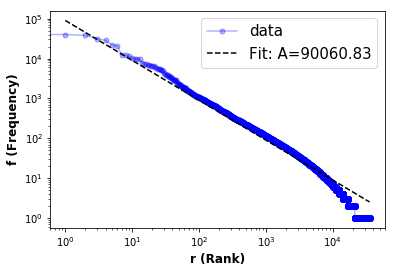

A = 90060.83


In [25]:
plt.loglog(Y,'-o',color='blue',markersize=5,alpha=0.3, label = 'data')
plt.plot(x, func(x, *popt), '--',color='black',label='Fit: A=%.2f' % tuple(popt))
plt.xlabel('r (Rank)', fontweight='bold', fontsize=12)
plt.ylabel('f (Frequency)',fontweight='bold', fontsize=12)
plt.legend(prop={'size':15})
plt.show()

print('A = %.2f'%(popt[0]))

# Heap's Law

In [26]:
def heaps(corpus):
    
    modV = 0 # size of vocabulary (Types)
    T = 0    # Number of tokens
    D = {}
    
    for i in corpus:

        j = i.split(' ')

        for k in j:

            if k in D:
                D[k] += 1
            else:
                D[k] = 1
    modV = len(list(D.keys()))
    T = sum(list(D.values()))
    
    return modV,T


In [27]:
V,N = [],[]
S = len(datac)
l=100
while l <= S:
    
    v,n = heaps(datac[:l]) ### increases the size of corpus with every iteration by l.
                           ### l should be large for huge files
    V.append(v)
    N.append(n)
    l+=100   

## Curve fitting for Heap's Law :

### Fitness Function :

### $$ |V| = KN^{\beta} $$



In [28]:
from scipy.optimize import curve_fit

def func(n, k, b):
    return k * (n**b)

popt, pcov = curve_fit(func, N,V)

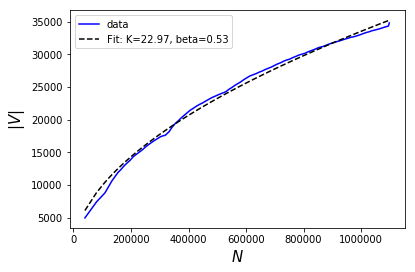

K = 22.97, beta = 0.53


In [29]:
plt.plot(N,V,'-', color='blue', label='data')
plt.plot(N, func(N, *popt), '--',color='black',label='Fit: K=%.2f, beta=%.2f' % tuple(popt))
plt.ylabel(r'$|V|$', fontsize=15,fontweight='bold')
plt.xlabel(r'$N$', fontsize=15,fontweight='bold')
plt.legend()
plt.show()

print('K = %.2f, beta = %.2f'%tuple(popt))